# Câu 1:
- Tạo ma trận A(5,5) với các giá trị ngẫu nhiên từ  -10 đến 5
- Thay thế tất cả các phần tử < 0 bằng 0
- Tạo sparse matrix S từ A
- Tính sparsity của sparse matrix

In [4]:
import numpy as np
from scipy.sparse import csr_matrix
import lib_matrix as lib

In [5]:
A = lib.create_matrix_random(5,5,-10,5)

In [6]:
A

array([[-4., -9., -3.,  0., -4.],
       [ 2.,  0.,  5.,  4.,  4.],
       [-7.,  0.,  5., -7., -6.],
       [-7., -5., -8., -8., -4.],
       [-2., -9., -3.,  3., -4.]])

In [7]:
A[A < 0] = 0
A

array([[0., 0., 0., 0., 0.],
       [2., 0., 5., 4., 4.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0.]])

In [9]:
S = csr_matrix(A)
print(S)

  (1, 0)	2.0
  (1, 2)	5.0
  (1, 3)	4.0
  (1, 4)	4.0
  (2, 2)	5.0
  (4, 3)	3.0


In [11]:
sparsity = 1.0 - np.count_nonzero(A)/A.size
sparsity

0.76

# Câu 2:
- Một trong những ứng dụng thực sự của ma trận thưa thớt là giảm không gian rất lớn để lưu trữ ma trận thưa thớt
- Hãy tạo ra một ma trận BigA(1000, 1000) phần tử ngẫu nhiên từ -10 đến 5
- Thay thế tất cả các phần tử < 0  bằng 0 trong ma trận BigA
- Tính kích thước của ma trận BigA
- Tạo sparse matrix BigS từ BigA
- Tính sparsity của sparse matrix
- Trực quan hóa BigS

In [12]:
bigA = lib.create_matrix_random(1000, 1000, -10, 5)
bigA.size

1000000

In [13]:
bigA[:10]

array([[ -9.,  -9.,   4., ..., -10.,   4.,  -7.],
       [  0.,  -3.,  -4., ...,   4.,  -5.,   4.],
       [ -5.,  -6.,  -7., ...,   1.,   1., -10.],
       ...,
       [ -4.,   3.,   2., ...,   2.,  -2.,  -2.],
       [ -8.,   5.,   2., ...,  -3.,  -4.,  -2.],
       [  5.,  -7.,  -3., ...,   1.,  -6.,   2.]])

In [14]:
bigA[bigA < 0] = 0

In [15]:
bigA[:10]

array([[0., 0., 4., ..., 0., 4., 0.],
       [0., 0., 0., ..., 4., 0., 4.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 3., 2., ..., 2., 0., 0.],
       [0., 5., 2., ..., 0., 0., 0.],
       [5., 0., 0., ..., 1., 0., 2.]])

In [18]:
bigA.nbytes

8000000

In [21]:
bigASize = bigA.nbytes/(1024**2)
print("Size of full matrix with zero: ", bigASize, "MB")

Size of full matrix with zero:  7.62939453125 MB


In [24]:
bigS = csr_matrix(bigA)
bigS.size

312748

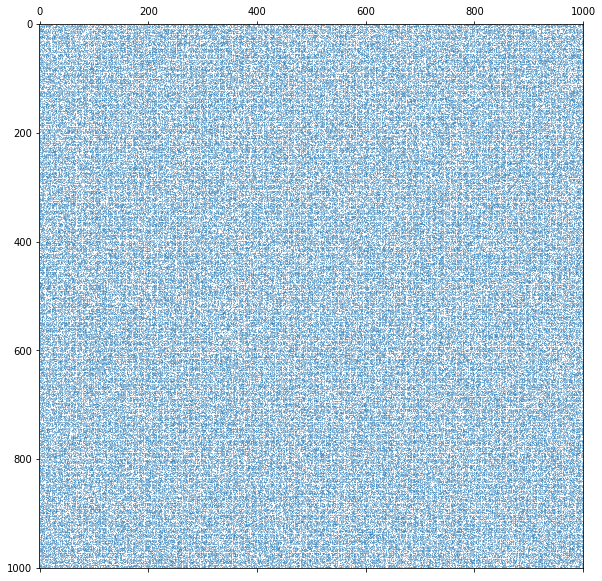

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.spy(bigS, markersize= 0.1)
plt.show()

In [31]:
bigSSize = bigS.data.nbytes/(1024**2)
print("Size of sparse csr_matrix: ", bigSSize, "MB")

Size of sparse csr_matrix:  2.386077880859375 MB


# Các dạng nén dữ liệu thưa thớt
- bsr_matrix: Block Sparse Row matrix
- coo_matrix: COOrdinate format matrix
- csc_matrix: Compressed Sparse Column matrix
- csr_matrix: Compressed Sparse Row matrix
- dia_matrix: Sparse matrix with DIAgonal storage
- dok_matrix: Dictionary Of Keys based sparse matrix.
- lil_matrix: Row-based linked list sparse matrix

https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/

# Câu 3:
- Tạo ma trận thưa thớt ngẫu nhiên S(5,5) với mật độ cụ thể density= 0.25
- Ghi chú:
    - Giá trị mật độ (Density value) có nghĩa là ma trận được tạo là một full matrix với density = 0 có nghĩa ma trận không có phần tử 0. Tương tự density=0.5 có nghĩa là ma trận có 50% số item khác 0.
- Chuyển S thành full matrix A
- Tạo ma trận thưa thớt ngẫu nhiên S1(5,5) với mật độ cụ thể density=0.25 và item khác 0 sẽ bằng 1
- Chuyển S1 thành full matrix 1
- Trực quan hóa S,S1.

In [34]:
import scipy.sparse as sparse
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# set random seed to repeat
np.random.seed(42)
#create sparse matrix with density = 0.25
S = sparse.random(5,5, density=0.25)
print(S)

  (3, 1)	0.3042422429595377
  (1, 3)	0.5247564316322378
  (0, 0)	0.43194501864211576
  (3, 4)	0.2912291401980419
  (1, 2)	0.6118528947223795
  (4, 1)	0.13949386065204183


In [38]:
#convert the sparse matrix to full matrix
A = S.toarray()
A

array([[0.43194502, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.61185289, 0.52475643, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.30424224, 0.        , 0.        , 0.29122914],
       [0.        , 0.13949386, 0.        , 0.        , 0.        ]])

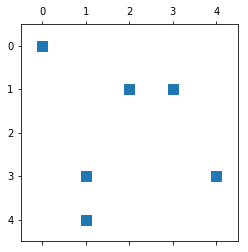

In [39]:
plt.spy(S)

In [40]:
#create sparse matrix with density = 0.25 và item khác 0 sẽ bằng 1
S1 = sparse.random(5,5, density=0.25, data_rvs = np.ones)
print(S1)

  (0, 0)	1.0
  (0, 1)	1.0
  (1, 4)	1.0
  (3, 2)	1.0
  (0, 4)	1.0
  (2, 1)	1.0


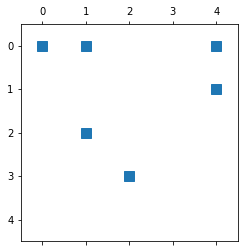

In [41]:
plt.spy(S1)

## Url view more
https://cmdlinetips.com/2019/02/how-to-create-random-sparse-matrix-of-spec